# Introduction to Machine Learning - Exercise 7
Goal of the excercise is to code selected part of the Decision tree algorithm which is focused on the optimum split part using gini index.

After that the scikit-learn implementation of the Decision tree basic usage will be demonstrated.

![meme02](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_07_meme_02.jpg?raw=true)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Load the *Iris* dataset
https://archive.ics.uci.edu/dataset/53/iris
* One of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.
* The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
* One class is linearly separable from the other 2 - the latter are not linearly separable from each other.uted?

|Variable Name | Role | Type | Units |
|:-------|:-------|:-------|:-------|
|sepal length | Feature | Continuous | cm |
|sepal width | Feature | Continuous | cm |
|petal length | Feature | Continuous | cm |
|petal width | Feature | Continuous | cm |
|class | Target | Categorical | Iris Setosa, Iris Versicolour, or Iris Virginica |

In [3]:
df = pd.read_csv('https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/raw/refs/heads/main/datasets/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 💡 Let's take a look at the data first
* 🔎 Do you have an idea how would you divide the data into groupd based on the assigned classed by vertical or horizontal lines?

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

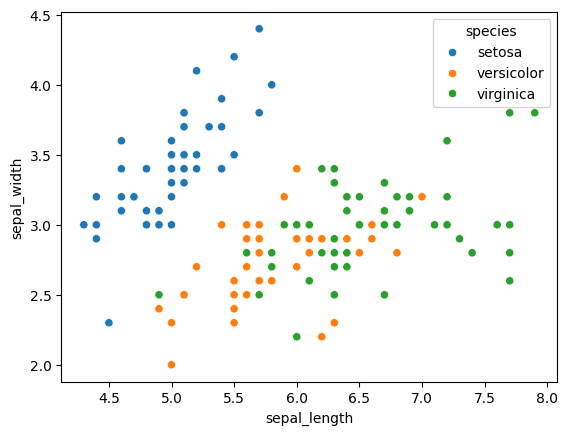

In [4]:
sns.scatterplot(data = df, x='sepal_length', y='sepal_width', hue='species')

# And now? 😊

<Axes: xlabel='petal_length', ylabel='petal_width'>

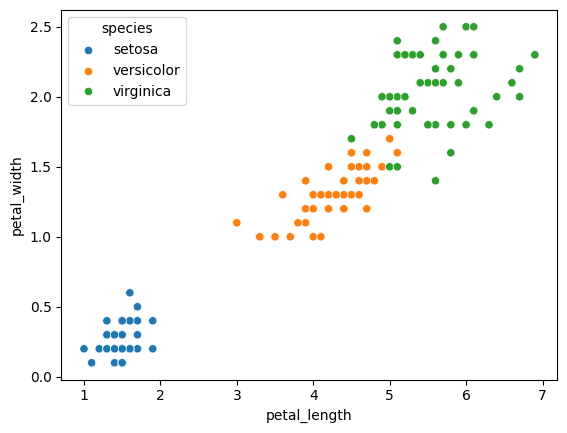

In [5]:
sns.scatterplot(data = df, x='petal_length', y='petal_width', hue='species')

# Also it's always reasonable to take a look at the number of classes in the dataset
* 💡You need to know beforehand about missing values or imbalance of labels

In [6]:
df.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


# 🔎 What is the purpose of the classification algorithms?
* How the algorithms work in general?
* How does **Decision tree** work in a very simple terms?
    * What is a split?
        * 🔎 Is the data separated only by vertical/horizontal lines or are there any inclined straight lines or curves used?
    * How can we decide on **which feature** and on **which condition** we should split?
    * What is in the leaf of the **Decision tree**?
        * **When** will the decision tree **stop the growth**?

# 📊 Gini Index
* What does it tell us?
    * What is the **minimum** and **maximum** value for 2 classes?
    * And for three?
    * What result should we expect for the whole data set?

## 🚀 Compute the gini index for the whole data set
* 💡 Take a look at [these slides](https://homel.vsb.cz/~pla06/files/fml/fml_06.pdf) for the formulas and examples

![meme03](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_07_meme_03.jpg?raw=true)

### Formulas

* Gini index:
  
$$
G(S) = 1 - \sum_{j=1}^{k} p_{j}^{2}
$$

* where the $p_{j}$  is a fraction of points that belongs to the class j from a set S$

* Gini impurity:
$$
G(S \Rightarrow S_{1},...,S_{r}) = \sum_{i=1}^{r} \frac{S_i}{S} G(S_i)
$$

In [7]:
def gini_index(data: pd.DataFrame):
    probs = 0
    labels = data.species.unique()
    for l in labels:
        p = data.loc[data.species == l].shape[0] / data.shape[0]
        probs += p ** 2
    return 1 - probs

In [8]:
gini_index(df)

0.6666666666666667

## 🚀 Take only the *sepal_width* attribute
* Try to split the by attribute by value *3.35 (<= 3.35)*
* Compute the gini index for the left and the right side of the split
    * Left: 0.629
    * Right: 0.285
* Compute the total gini impurity for this split
    * Total: 0.546

    
**How to solve the example?**
$$
Gini(left) = 1 - \left[ \left(\frac{45}{114}\right)^2 + \left(\frac{49}{114}\right)^2 + \left(\frac{20}{114}\right)^2 \right] = 0.629
$$

$$
Gini(right) = 1 - \left[ \left(\frac{5}{36}\right)^2 + \left(\frac{1}{36}\right)^2 + \left(\frac{30}{36}\right)^2 \right] = 0.285
$$

$$
GiniImpurity = \frac{|df_{left}|}{|df|} * Gini(left) + \frac{|df_{right}|}{|df|} * Gini(right) =  \frac{114}{150} * 0.629 + \frac{36}{150} * 0.285 = 0.546
$$



In [9]:
df_left = df[df.sepal_width <= 3.35]
df_left.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [10]:
df_left.shape

(114, 5)

In [11]:
df_left.species.value_counts()

,count
species,
versicolor,49
virginica,45
setosa,20


In [12]:
gini_index(df_left)

0.6286549707602339

In [13]:
df_right = df[df.sepal_width > 3.35]
df_right.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [14]:
df_right.shape

(36, 5)

In [15]:
df_right.species.value_counts()

,count
species,
setosa,30
virginica,5
versicolor,1


In [16]:
gini_index(df_right)

0.28549382716049376

In [17]:
gini_imp = (df_left.shape[0] / df.shape[0]) * gini_index(df_left) + (df_right.shape[0] / df.shape[0]) * gini_index(df_right)
gini_imp

0.5462962962962963

# 🎯 Repeat the process for the all 4 attributes and find the best split
* You will try all the possible boundaries along all the features, i.e. all the axes petal width and sepal width.
    * 💡 How to set the boundary?
        * Select only the unique values of the chosen attribute (.unique() function)
        * Sort the values (np.sort())
        * Iterate over the array of the values, take every two consecutive numbers and compute their mean
        * The mean is the current split boundary
* For each split the algorithm will compute the **Gini impurity** of the two groups created.
* 💡 Finally you will choose the decision boundary (best split) that gives the lowest Gini impurity for the two groups from all the 4 attbibutes

### Results:
* index = 0, Sepal Length < 5.45, Gini = 0.44
* index = 1, Sepal Width < 3.35, Gini = 0.54
* index = 2, Petal Length < 2.45, Gini = 0.33
* index = 3, Petal Width < 0.80, Gini = 0.33

* **Selected split:**
    * **index = 2, Petal Length < 2.45, Gini = 0.33**
    * ... or index = 3, Petal Width < 0.80, Gini = 0.33

# 🔎 If we have only one split - how will the classification rule-set look like?

In [18]:
def print_splits(df: pd.DataFrame, column: str) -> None:
    pass

## sepal_length

* Gini: 0.662, Boundary: 4.35
* Gini: 0.648, Boundary: 4.45
* Gini: 0.644, Boundary: 4.55
* Gini: 0.624, Boundary: 4.65
* Gini: 0.614, Boundary: 4.75
* Gini: 0.587, Boundary: 4.85
* Gini: 0.581, Boundary: 4.95
* Gini: 0.547, Boundary: 5.05
* Gini: 0.498, Boundary: 5.15
* Gini: 0.482, Boundary: 5.25
* Gini: 0.474, Boundary: 5.35
* Gini: 0.439, Boundary: 5.45
* Gini: 0.449, Boundary: 5.55
* Gini: 0.475, Boundary: 5.65
* Gini: 0.475, Boundary: 5.75
* Gini: 0.492, Boundary: 5.85
* Gini: 0.500, Boundary: 5.95
* Gini: 0.512, Boundary: 6.05
* Gini: 0.520, Boundary: 6.15
* Gini: 0.528, Boundary: 6.25
* Gini: 0.558, Boundary: 6.35
* Gini: 0.580, Boundary: 6.45
* Gini: 0.598, Boundary: 6.55
* Gini: 0.591, Boundary: 6.65
* Gini: 0.603, Boundary: 6.75
* Gini: 0.608, Boundary: 6.85
* Gini: 0.617, Boundary: 6.95
* Gini: 0.609, Boundary: 7.05
* Gini: 0.614, Boundary: 7.15
* Gini: 0.629, Boundary: 7.25
* Gini: 0.634, Boundary: 7.35
* Gini: 0.639, Boundary: 7.50
* Gini: 0.644, Boundary: 7.65
* Gini: 0.662, Boundary: 7.80
* Best -> Gini: 0.439, Boundary: 5.45

In [19]:
print_splits(df, 'sepal_length')

## sepal_width

In [20]:
print_splits(df, 'sepal_width')

## petal_length

In [21]:
print_splits(df, 'petal_length')

## petal_width

In [22]:
print_splits(df, 'petal_width')

# 🎯 Split the data using the selected split criterion
* 💡 **Use the one using petal_length 😊**

1) Repeat the whole process one more time for the part of the data with more than 1 class
2) Find the best split again
3) Draw the decision tree with the two defined levels you have created this way -
    * You can use any graphic editor you like, even the MS Paint 😃

In [25]:
df_petal_left = df[df.petal_length <= 2.45]
df_petal_right = df[df.petal_length > 2.45]

In [26]:
df_petal_left.species.value_counts()

,count
species,
setosa,50


In [27]:
df_petal_right.species.value_counts()

,count
species,
versicolor,50
virginica,50


In [28]:
for c in df_petal_right.columns[:-1]:
    print(f'{c}')
    print_splits(df_petal_right, c)
    print(''.join(['-' for _ in range(50)]))

sepal_length
--------------------------------------------------
sepal_width
--------------------------------------------------
petal_length
--------------------------------------------------
petal_width
--------------------------------------------------


# 📊 Introduction to the scikit-learn (Sklearn) library
* Open source library for predictive data analysis. Contains algorithms for classification, clustering and others.

![meme01](https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_07_meme_01.jpg?raw=true)

- Decision tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Let's start with splitting the data into the input and output part
* 💡 Usually named as a *X* and *y* variables

In [29]:
X, y = df.loc[:, df.columns != 'species'], df.loc[:, 'species']

In [30]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


# What is the size of our data?

In [32]:
X.shape, y.shape

((150, 4), (150,))

## 🔎 Doing evaluation process for every classification or regressions task is mandatory
* Do you know how to evaluate models?
* Do you know **train test split** method for evaluation?
* Do you know any **different** evaluation process?

## Lets continue with train test split process. Split dataset to train:test ratio 60:40. Check how many records/rows do you have in splitted variables.
* 💡 Number of rows in the *X* and *y* in the Train/Test part of the data has to be equal

In [33]:
X = df.loc[:, df.columns != 'species']
y = df.loc[:, 'species']

## Take a look on data in variable y_test
- Can you detect how many elements of each class is represented in test split?

In [34]:
from sklearn.model_selection import train_test_split

# stratify=y pour conserver la proportion des classes dans train et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Vérifier que les tailles correspondent pour X et y
print("X_train rows:", X_train.shape[0], "y_train rows:", y_train.shape[0])
print("X_test  rows:", X_test.shape[0],  "y_test  rows:",  y_test.shape[0])

X_train rows: 90 y_train rows: 90
X_test  rows: 60 y_test  rows: 60


# 🚀 Create the Decision tree classifier instance

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
print(clf)

DecisionTreeClassifier(random_state=42)


In [36]:
clf

DecisionTreeClassifier(random_state=42)

## 💡 Use *fit()* method for training of classifier

In [37]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Lets use trained model for the prediction part
* 💡 Get predictions via the method *predict()*

In [38]:
y_pred = clf.predict(X_test)
print("Exemple de prédictions (5 premières) :")
print(y_pred[:5])

Exemple de prédictions (5 premières) :
['setosa' 'versicolor' 'setosa' 'setosa' 'virginica']


# 🔎 Can we evaluate our model?
* How good is it?
* What does accuracy mean?

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print("\nMatrice de confusion (rows = true, cols = pred) :")
print(pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_))
print("\nRapport de classification :")
print(report)

Accuracy: 0.950

Matrice de confusion (rows = true, cols = pred) :
            setosa  versicolor  virginica
setosa          20           0          0
versicolor       0          19          1
virginica        0           2         18

Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.90      0.95      0.93        20
   virginica       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



## How does the trained Decision tree look like?

In [40]:
from sklearn.tree import export_text

tree_text = export_text(clf, feature_names=list(X.columns))
print(tree_text)

|--- petal_length <= 2.70
|   |--- class: setosa
|--- petal_length >  2.70
|   |--- petal_length <= 4.95
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  1.65
|   |   |   |--- sepal_width <= 3.00
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal_width >  3.00
|   |   |   |   |--- class: versicolor
|   |--- petal_length >  4.95
|   |   |--- petal_width <= 1.70
|   |   |   |--- petal_length <= 5.05
|   |   |   |   |--- class: virginica
|   |   |   |--- petal_length >  5.05
|   |   |   |   |--- sepal_width <= 2.85
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- sepal_width >  2.85
|   |   |   |   |   |--- class: virginica
|   |   |--- petal_width >  1.70
|   |   |   |--- class: virginica



In [41]:
tree_text

'|--- petal_length <= 2.70\n|   |--- class: setosa\n|--- petal_length >  2.70\n|   |--- petal_length <= 4.95\n|   |   |--- petal_width <= 1.65\n|   |   |   |--- class: versicolor\n|   |   |--- petal_width >  1.65\n|   |   |   |--- sepal_width <= 3.00\n|   |   |   |   |--- class: virginica\n|   |   |   |--- sepal_width >  3.00\n|   |   |   |   |--- class: versicolor\n|   |--- petal_length >  4.95\n|   |   |--- petal_width <= 1.70\n|   |   |   |--- petal_length <= 5.05\n|   |   |   |   |--- class: virginica\n|   |   |   |--- petal_length >  5.05\n|   |   |   |   |--- sepal_width <= 2.85\n|   |   |   |   |   |--- class: versicolor\n|   |   |   |   |--- sepal_width >  2.85\n|   |   |   |   |   |--- class: virginica\n|   |   |--- petal_width >  1.70\n|   |   |   |--- class: virginica\n'

### We can use either text representation as follows...

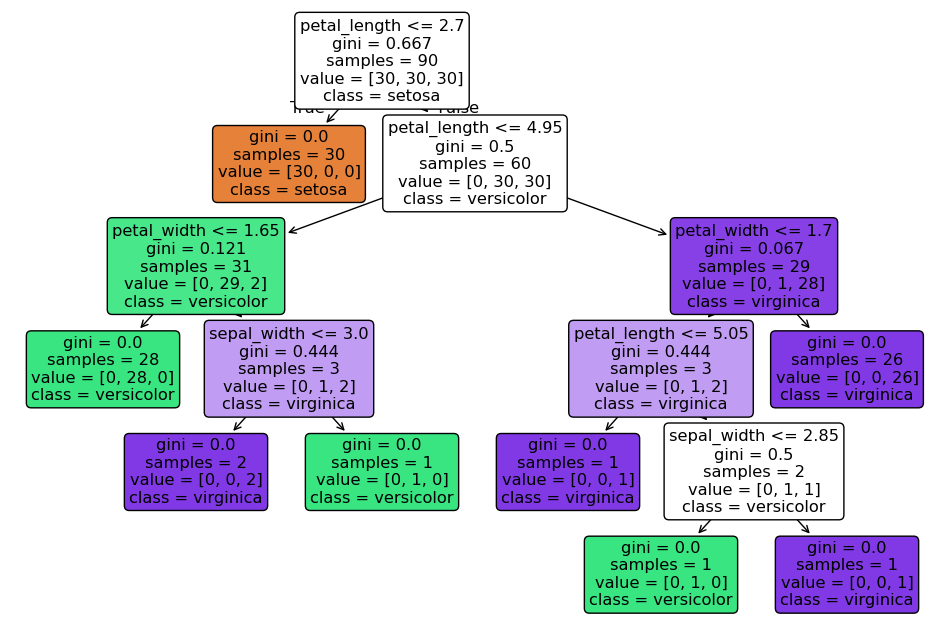

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()

### ...or more convinient graphical diagram 😊

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


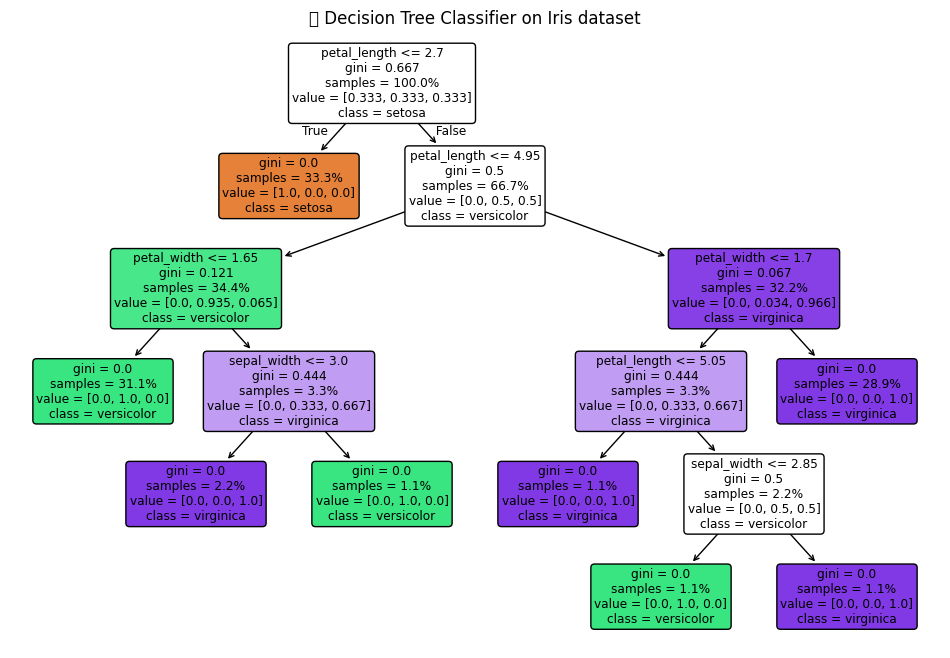

In [43]:
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    proportion=True
)
plt.title("Decision Tree Classifier on Iris dataset")
plt.show()

The decision tree starts by splitting the data based on petal_length. If the value is less than or equal to 2.7, the sample is classified as Setosa.
For larger petal lengths, the tree continues to split mainly on petal_width and sepal_width to separate Versicolor and Virginica flowers.

Each node shows the Gini impurity, the percentage of samples, the class distribution, and the predicted class.

Nodes with gini = 0 represent pure leaves, where all samples belong to the same class.

The filled colors indicate the dominant class at each node.

Overall, the tree successfully distinguishes the three Iris species using petal length and width as the most informative features.

# ✅ Task (2p)
* Finish the implementation task from the exercise